In [1]:
# 2020-01-28
# Versoes em uso: eram
# NumPy: 1.17.4  verificar
# SciPy: 1.3.1   verificar

import numpy as np
import numpy.ma as ma  # masked array
import numpy.fft as fft
from machine_selection import set_screen_size_by_machine

# 2019-03-15
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
import pandas as pd
import csv
from collections import defaultdict

# 2019-11-06
import time

# 2020-01-29
import timeit

# 2019-11-03
from filebatch_class import (FileBatch)

# 2019-03-09
from gamma_spectrum_class import (Spec)

# 2019-09-16
from gauss_funcs import gaus_fw, gaus_sig

np.random.random(100)

# 2019-07-15
# https://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html#basics
from numpy.polynomial import Polynomial as P
from numpy.polynomial.polynomial import (polyfit, polyval)

from scipy.signal import (cwt, ricker, find_peaks, find_peaks_cwt, peak_widths, convolve, correlate, csd, periodogram, welch)
from scipy.ndimage import label, generate_binary_structure, find_objects  # 2019-09-18
from scipy.linalg import (norm)
from scipy.spatial.distance import (pdist, cdist)

from scipy.optimize import (curve_fit, root, lsq_linear, minimize)
from scipy.stats import (iqr)
from scipy.special import (expit)
import base_line_funcs as blf
import spectra_regions_funcs as spreg

import matplotlib.pyplot as plt

# frm spectra_regions_funcs import (total_analysis2)
import csv
import pickle
from bokeh.models import ColumnDataSource, Whisker, Range1d, LabelSet, Label
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh import palettes

In [2]:
def spectr_transf(ai, *args):
    specRef  = args[0]
    specTest = args[1]
    a0=ai[0]
    a1=ai[1]
    a2=ai[2]
    transSpecTest = [a0,0] + ([a1,1]+[a2,0]*specTest) * specTest
    signif = 1.0
    for i, pair in enumerate(specRef):
        compareChan = int(np.round(transSpecTest[i][0]))
        if compareChan in (0,4095):
            prodCnts = transSpecTest[i][1] * specRef[compareChan][1]
            signif += np.log(prodCnts + 1.0)
    return 1.0e6 / signif

In [3]:
def spectr_transf_lin(ai, *args):
    specRef  = args[0]
    specTest = args[1]
    a0=ai[0]
    a1=ai[1]
    transSpecTest = [a0,0] + [a1,1] * specTest
    signif = 1.0
    for i, pair in enumerate(specRef):
        compareChan = int(np.round(transSpecTest[i][0]))
        if compareChan in (0,4095):
            prodCnts = transSpecTest[i][1] * specRef[compareChan][1]
            signif += np.log(prodCnts + 1.0)
    return 1.0e6 / signif

In [4]:
##################################################

## 2019-nov-warp2.ipynb
## P.P.
## 2019-11-03: Integrando an'alise em lote de 2019_big-histogram.ipynb 
## com an'alise Cwt+ridges de 2019-cwt-analysis-real_with_effic-curve-Pandas.ipynb

fb = FileBatch()
spec = Spec()

In [5]:
fb.slotSetBatchCHN(
    '../Genie_Transfer/Si'
)

../Genie_Transfer/Si


In [6]:
# print (fb.arqslist)
print (fb.numarqstxt, ' arquivos')

Num de arquivos:       1134 


  arquivos


In [7]:
np.random.random(100)

array([0.63482287, 0.86598282, 0.07764565, 0.87010804, 0.97139825,
       0.21552025, 0.81090015, 0.63332899, 0.04658186, 0.23425061,
       0.15706534, 0.86691852, 0.82864751, 0.8131276 , 0.73401686,
       0.76049374, 0.76926145, 0.29918919, 0.34013392, 0.89193186,
       0.64619659, 0.45460067, 0.08976597, 0.46466312, 0.56927984,
       0.52959627, 0.45588738, 0.35815032, 0.34744047, 0.1885235 ,
       0.32120991, 0.02813424, 0.91667121, 0.42995931, 0.3941577 ,
       0.31908082, 0.96233906, 0.65197519, 0.2243106 , 0.34375735,
       0.33096127, 0.79448911, 0.61996654, 0.27016947, 0.685754  ,
       0.53997211, 0.689282  , 0.0460812 , 0.29584935, 0.33173973,
       0.38366114, 0.97710947, 0.17849804, 0.80162922, 0.83906862,
       0.81362596, 0.72169769, 0.0848945 , 0.26065962, 0.73648071,
       0.81175474, 0.79122643, 0.25489711, 0.87837154, 0.37402325,
       0.95345434, 0.33620575, 0.83720992, 0.32521312, 0.78890075,
       0.79395584, 0.32102918, 0.92828709, 0.56856497, 0.76283

In [8]:
# https://numpy.org/doc/1.17/reference/random/generated/numpy.random.Generator.integers.html
rng = np.random.default_rng()
# rng.integers(100, size=10)
cemarqs = rng.integers(fb.numarqs, size=100)
cemarqs

array([ 909,  194,  642,   32,  535,  105,  803,  425,  916,  958, 1125,
        469,  888,  315, 1022,  635,  573,   16,  158,  114,  659,  966,
        590, 1003, 1011,  323,  152,   15,  388,  364,  601,  716,  644,
        138,  705,   93,  432,  965, 1123,  655,  126,  294, 1060,  762,
        976,  967,  537,  114,  583,  342,  126,  756, 1060,  539,  505,
        704,    2,  299,  293,  828,  659,   59,  734,  304,   33,  159,
        813,  432,  465, 1050,  463,  272,  768,  387,   16,  209,  974,
        654,  880,   69,  825,   31, 1129,  825,   21,   35,   64,  446,
        787,   23,  353, 1130, 1061, 1109, 1106,  468,  332, 1093,  220,
        413])

In [9]:
indicetreze = cemarqs[13]
# 2019-12-14 Vou fixar o indicetreze em 162. Espectro de bombona, bem legal. Para isso, habilitar:
# indicetreze = 162
# 2020-01-28 J'a n~ao 'e mais isso. Agora farei convolu'c~ao de dois espectros.
indicetreze

315

In [10]:
arq_treze = fb.lp[indicetreze]
arq_treze

'../Genie_Transfer/Si/SI2007/SI09907.Chn'

In [11]:
aleator_spec = Spec()
aleator_spec.readSp(arq_treze)

0

In [12]:
aleator_spec.spCounts
chans = np.asarray(list(range(len(aleator_spec.spCounts))))
arrSpecRef = np.asarray([chans, aleator_spec.spCounts])

In [13]:
arrSpecRef

array([[   0,    1,    2, ..., 4093, 4094, 4095],
       [   0,    0,    0, ...,    0,    3,    1]])

In [14]:
arrSpecRef.shape

(2, 4096)

In [15]:
# arrSpecTest = arrSpecRef.copy()

indicequinze = cemarqs[15]
print(fb.lp[indicequinze])

spec = Spec()
spec.readSp(fb.lp[indicequinze])
arrSpecTest = np.asarray([np.asarray(list(range(len(spec.spCounts)))), spec.spCounts])

arrSpecTest.shape

../Genie_Transfer/Si/SI2019/SI02819.Chn


(2, 4096)

In [16]:
arrSpecRef[1].shape

(4096,)

In [17]:
arrSpecTest[1].shape

(4096,)

In [18]:
# 2020-01-28
# Gr'aficos:
default_plot_width, default_plot_height = set_screen_size_by_machine()

In [19]:
xs = chans
y0s = arrSpecRef[1]
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="arrSpecRef[1]",
   # y_range=[-1000.0, 1000.0], title="synth",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="green")
show(bokspecdiag)

In [20]:
xs = chans
y0s = arrSpecTest[1]
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="arrSpecTest[1]",
   # y_range=[-1000.0, 1000.0], title="synth",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="green")
show(bokspecdiag)

In [21]:
t1 = time.time()
t1

1580754481.6236324

In [22]:
h = cdist(arrSpecTest.T, arrSpecRef.T)
h

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        4.09300000e+03, 4.09400110e+03, 4.09500012e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.09200000e+03, 4.09300110e+03, 4.09400012e+03],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.09100000e+03, 4.09200110e+03, 4.09300012e+03],
       ...,
       [4.09300000e+03, 4.09200000e+03, 4.09100000e+03, ...,
        0.00000000e+00, 3.16227766e+00, 2.23606798e+00],
       [4.09400012e+03, 4.09300012e+03, 4.09200012e+03, ...,
        1.41421356e+00, 2.00000000e+00, 1.00000000e+00],
       [4.09500012e+03, 4.09400012e+03, 4.09300012e+03, ...,
        2.23606798e+00, 2.23606798e+00, 0.00000000e+00]])

In [23]:
h.shape

(4096, 4096)

In [24]:
hdiag = h.diagonal()
hdiag

array([0., 0., 0., ..., 0., 2., 0.])

In [25]:
t2 = time.time()
t2

1580754482.1710293

In [26]:
sum(hdiag)

696376.0

In [27]:
y0s = hdiag
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="hdiag",
   # y_range=[-1000.0, 1000.0], title="synth",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="green")
show(bokspecdiag)

In [28]:
t3 = time.time()
t3

1580754482.6633277

In [29]:
h3 = np.sum((arrSpecTest.T - arrSpecRef.T)**2,axis=1)

In [30]:
t4 = time.time()
t4

1580754482.8714519

In [31]:
norm(arrSpecTest.T - arrSpecRef.T)

43446.979987106126

In [32]:
sum(h3)

1887640070

In [33]:
y0s = h3
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="h3",
   # y_range=[-1000.0, 1000.0], title="synth",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="blue")
show(bokspecdiag)

In [34]:
t1

1580754481.6236324

In [35]:
t2

1580754482.1710293

In [36]:
t2-t1

0.5473968982696533

In [37]:
t3

1580754482.6633277

In [38]:
t4

1580754482.8714519

In [39]:
t4-t3

0.20812416076660156

In [40]:
specTest = arrSpecTest.T
specTest

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [4093,    0],
       [4094,    1],
       [4095,    1]])

In [41]:
specRef = arrSpecRef.T
specRef

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [4093,    0],
       [4094,    3],
       [4095,    1]])

In [42]:
# signal 1 and 2:
s1 = arrSpecRef[1]
# s2 = arrSpecTest[1]
xs = list(range(len(s1)))

s2 = np.zeros(len(s1))
# Tentando espectro deslocado artificialmente:
for i in range(53, len(s2)-1):
    s2[i] = s1[i-53]

In [43]:
len(s2)

4096

In [44]:
s2[1000:1100]

array([ 238.,  291.,  256.,  279.,  276.,  281.,  335.,  386.,  388.,
        290.,  261.,  249.,  272.,  279.,  271.,  243.,  246.,  253.,
        271.,  233.,  234.,  284.,  248.,  257.,  261.,  261.,  256.,
        268.,  228.,  234.,  249.,  242.,  231.,  222.,  266.,  282.,
        405.,  378.,  291.,  273.,  241.,  240.,  240.,  258.,  263.,
        273.,  240.,  238.,  223.,  242.,  216.,  217.,  223.,  223.,
        248.,  238.,  255.,  234.,  226.,  259.,  226.,  223.,  237.,
        239.,  241.,  229.,  220.,  246.,  241.,  239.,  220.,  250.,
        221.,  260.,  230.,  231.,  238.,  244.,  234.,  244.,  242.,
        261.,  222.,  249.,  228.,  275.,  268.,  246.,  257.,  285.,
        222.,  270.,  508., 1104., 1295.,  733.,  307.,  219.,  223.,
        236.])

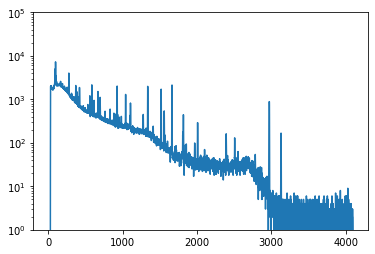

In [45]:
fs = 10e3
plt.semilogy(xs, s1)
plt.ylim([1, 1e5])
plt.show()

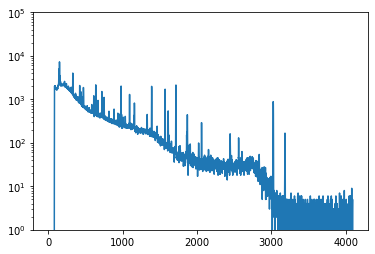

In [46]:
fs = 10e3
plt.semilogy(xs, s2)
plt.ylim([1, 1e5])
plt.show()

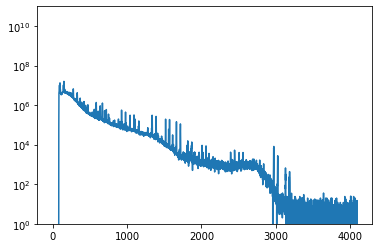

In [47]:
s1s2 = s1*s2
fs = 10e3
plt.semilogy(xs, s1s2)
plt.ylim([1, 1e11])
plt.show()

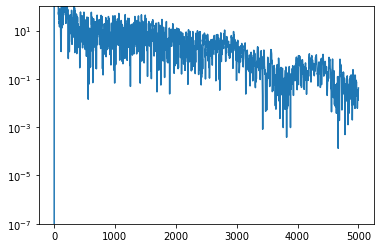

In [48]:
fs = 10e3
f, Pxx_den = periodogram(s1, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.show()

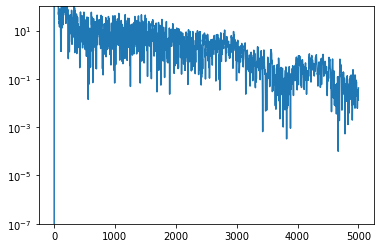

In [49]:
fs = 10e3
f, Pxx_den = periodogram(s2, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.show()

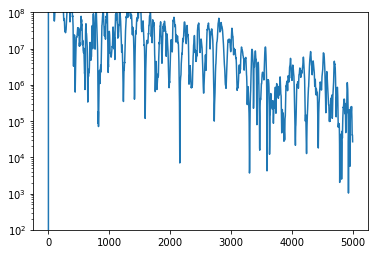

In [54]:
fs = 10e3
f, Pxx_den = periodogram(s1s2, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e2, 1e8])
plt.show()

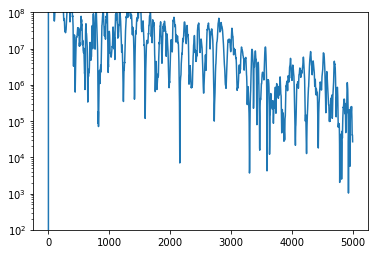

In [54]:
fs = 10e3
f, Pxx_den = welc(s1s2, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e2, 1e8])
plt.show()

In [51]:
fs = 10e3
f, Pxx_den = welch(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e4])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

NameError: name 'x' is not defined

In [ ]:
fs = 10e3
f, Pxx_den = welch(y, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
fs = 1000
f, Pxy = csd(x, y, fs, nperseg=1024)
plt.semilogy(f, np.abs(Pxy))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

In [ ]:
fs = 1000
f, Pxy = csd(x, y, fs, nperseg=1024)
plt.semilogy(f, np.abs(Pxy))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

In [ ]:
arrSpecRef[1]

In [ ]:
cross1 = csd(arrSpecRef[1], arrSpecTest[1])
cross1

In [ ]:
cross0 = csd(arrSpecRef[0], arrSpecTest[0])
cross0

In [ ]:
result = minimize(spectr_transf, [0,1,0], args=(specRef, specTest), method = 'Nelder-Mead')
result

In [ ]:
result = minimize(spectr_transf, [0,1,0], args=(specRef, specTest), method = 'Nelder-Mead')
result

In [ ]:
result = minimize(spectr_transf_lin, [0,1], args=(specRef, specTest), method = 'Nelder-Mead')
result

In [ ]:
a1 = 1.0
a2 = 0.0
for a0 in np.linspace(-10.0, 10.0, 50):
    result = spectr_transf([a0,a1,a2],specRef, specTest)
    print (a0)
    print (result)

In [ ]:
result = minimize(spectr_transf_lin, [0,1], args=(specRef, specTest), method = 'Nelder-Mead')
result

In [ ]:
xs = chans
y0s = arrSpecRef[1]
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="arrSpecRef[1]",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="green")
show(bokspecdiag)

In [ ]:
xs = chans
y0s = arrSpecTest[1]
bokspecdiag = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[10**1, 10**5], title="arrSpecTest[1]",
   x_axis_label='canais', y_axis_label='contagens'
)
bokspecdiag.circle(xs, y0s, color="green",size=2)
bokspecdiag.line(xs, y0s, color="green")
show(bokspecdiag)

In [ ]:
np.round(-31.4)

In [ ]:
10 in (6,9)